# Exploring the LegcoHK Data Set

Author: [Pili Hu](http://hupili.net)


## Pre-processing 

Load the downloaded data `legco-records-all-with-info.csv`.

The download script is `down-legcohk.py` in the same folder.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
legco = pd.read_csv('legco-records-all-with-info.csv')
legco.head(2)

,Unnamed: 0,topic_id,member_id,vote,vote-date,vote-time,motion-en,mover-en,mover-type,vote-separate-mechanism
0,0,17/10/2012-1,TSANG Yok-sing,Present,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,Dr Kenneth CHAN,Member,Yes
1,1,17/10/2012-1,Albert HO,Yes,17/10/2012,19:37:53,AMENDMENT BY DR HON KENNETH CHAN TO HON IP KIN...,Dr Kenneth CHAN,Member,Yes


In [3]:
legco_matrix = pd.DataFrame(index=legco['member_id'].unique())
for gn, g in legco.groupby('topic_id'):
    legco_matrix[gn] = g.set_index('member_id')['vote']
legco_matrix.head(2)

,01/02/2013-1,01/02/2013-2,01/02/2013-3,01/02/2013-4,01/02/2013-5,01/02/2013-6,01/02/2013-7,01/02/2013-8,03/07/2013-1,03/07/2013-10,...,31/10/2012-2,31/10/2012-3,31/10/2012-4,31/10/2012-5,31/10/2012-6,31/10/2012-7,31/10/2012-8,31/10/2012-9,31/10/2014-38,31/10/2014-39
TSANG Yok-sing,Present,Present,Present,Present,Present,Present,Present,Present,Present,Present,...,Present,Present,Present,Present,Present,Present,Present,Present,Present,Present
Albert HO,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No


In [4]:
def to_numeric(x):
    x[(x != 'Yes') & (x != 'No')] = 0
    x[x == 'Yes'] = 1
    x[x == 'No'] = -1
legco_matrix.apply(to_numeric)
legco_matrix.head(2)

,01/02/2013-1,01/02/2013-2,01/02/2013-3,01/02/2013-4,01/02/2013-5,01/02/2013-6,01/02/2013-7,01/02/2013-8,03/07/2013-1,03/07/2013-10,...,31/10/2012-2,31/10/2012-3,31/10/2012-4,31/10/2012-5,31/10/2012-6,31/10/2012-7,31/10/2012-8,31/10/2012-9,31/10/2014-38,31/10/2014-39
TSANG Yok-sing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albert HO,1,1,1,1,-1,1,1,-1,1,1,...,1,1,1,1,1,1,-1,-1,1,-1


In [5]:
X = np.matrix(legco_matrix.as_matrix()).astype('float')
X = X - np.mean(X, 0)

## A first visualisation via PCA

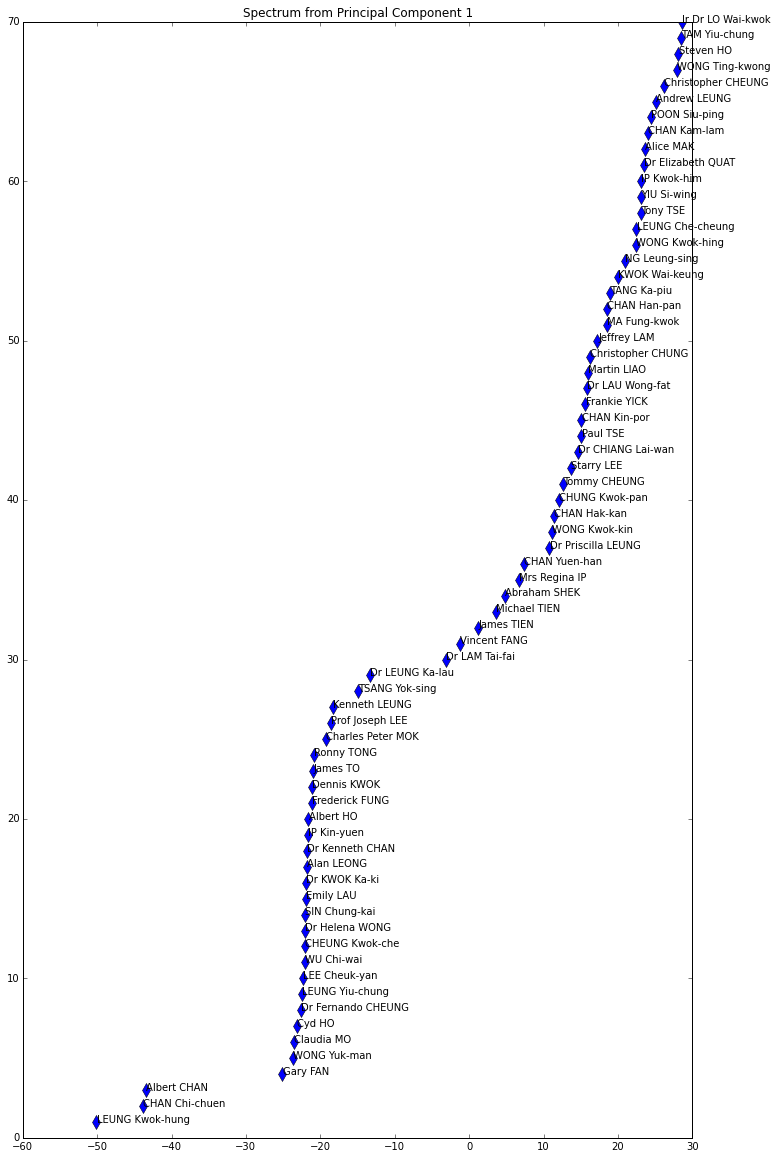

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
# X is of dimensions: n_samples x n_features
X_reduced = pca.fit_transform(X)
df_pc1 = pd.DataFrame(X_reduced, index=legco_matrix.index, columns=['PC1'])
df_pc1 = df_pc1.sort('PC1')
plt.figure(figsize=(12, 20))
plt.plot(df_pc1['PC1'], df_pc1.rank()['PC1'], 'd', markersize=10)
#yticks(df_pc1.rank()['PC1'], df_pc1.index)
for (_x, _y, _s) in zip(df_pc1['PC1'], df_pc1.rank()['PC1'], df_pc1.index):
    plt.annotate(_s, (_x, _y), xytext=(_x + 0.01, _y - 0.02))
plt.title('Spectrum from Principal Component 1')

## Graph visualization

We play with the LegCo data again...

In [7]:
len(legco_matrix.index)
len(legco_matrix.columns)

2335

In [8]:
#url_legco_hk_vote_matrix = 'https://course.ie.cuhk.edu.hk/~engg4030/tutorial/tutorial7/votes-matrix.csv'
#import pandas as pd
#df = pd.io.parsers.read_csv(url_legco_hk_vote_matrix, index_col='member')
df = legco_matrix
print 'number of users:', len(df.index)
print 'number of items:', len(df.columns)
df[:5]

number of users: 70
number of items: 2335


,01/02/2013-1,01/02/2013-2,01/02/2013-3,01/02/2013-4,01/02/2013-5,01/02/2013-6,01/02/2013-7,01/02/2013-8,03/07/2013-1,03/07/2013-10,...,31/10/2012-2,31/10/2012-3,31/10/2012-4,31/10/2012-5,31/10/2012-6,31/10/2012-7,31/10/2012-8,31/10/2012-9,31/10/2014-38,31/10/2014-39
TSANG Yok-sing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albert HO,1,1,1,1,-1,1,1,-1,1,1,...,1,1,1,1,1,1,-1,-1,1,-1
LEE Cheuk-yan,1,1,1,1,1,1,1,-1,1,1,...,0,0,0,0,0,0,0,0,1,-1
James TO,1,1,1,1,-1,1,1,-1,1,1,...,1,1,1,0,0,0,0,0,1,-1
CHAN Kam-lam,-1,-1,-1,-1,0,-1,-1,1,-1,0,...,0,0,0,0,0,0,1,0,-1,1


In [9]:
# Each column of DataFrame is a Series
# It's easier to retrieve and process series by series
dft = df.transpose()
dft[:5]

,TSANG Yok-sing,Albert HO,LEE Cheuk-yan,James TO,CHAN Kam-lam,LEUNG Yiu-chung,Dr LAU Wong-fat,Emily LAU,TAM Yiu-chung,Abraham SHEK,...,IP Kin-yuen,Dr Elizabeth QUAT,Martin LIAO,POON Siu-ping,TANG Ka-piu,Dr CHIANG Lai-wan,Ir Dr LO Wai-kwok,CHUNG Kwok-pan,Christopher CHUNG,Tony TSE
01/02/2013-1,0,1,1,1,-1,1,-1,1,-1,-1,...,1,-1,-1,-1,0,-1,-1,-1,-1,-1
01/02/2013-2,0,1,1,1,-1,1,-1,1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
01/02/2013-3,0,1,1,1,-1,1,-1,1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
01/02/2013-4,0,1,1,1,-1,1,-1,1,-1,-1,...,1,-1,-1,-1,0,-1,-1,-1,-1,-1
01/02/2013-5,0,-1,1,-1,0,-1,-1,-1,0,0,...,-1,0,-1,1,1,0,-1,-1,0,0


In [10]:
# We can use this way to measure similarity between two members
print sum(dft['Abraham SHEK'] == dft['Alan LEONG'])
print len(dft)

1170
2335


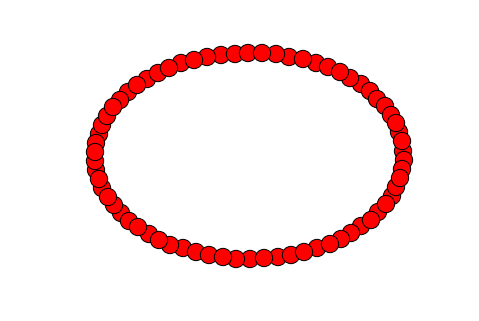

In [11]:
# We build graph from scratch to review the basic operations
legcohk = nx.Graph()
# Add nodes
for n in dft.columns:
    legcohk.add_node(n)
nx.draw(legcohk)

In [12]:
import itertools
# itertools saves you some typing from writing nested loops
for (u, v) in itertools.combinations(legcohk.nodes_iter(), 2):
    w = float(sum(dft[u] == dft[v])) / len(dft)
    #w = float(sum(dft[u] == dft[v]))
    legcohk.add_edge(u, v, weight=w)

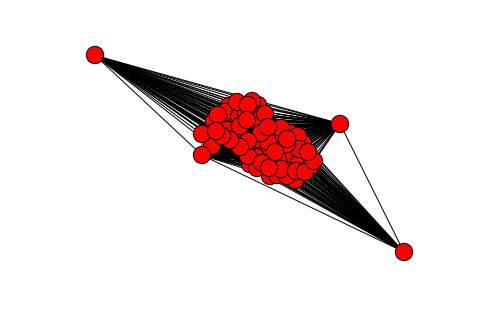

In [13]:
#%pylab inline
#%pylab
nx.draw(legcohk)
# Now it is a complete graph.
# There are too many edges cluttering the graph.

(array([ 582.,  610.,  530.,  518.,  508.,  640.,  458.,  234.,  346.,  404.]),
 array([ 0.05353319,  0.14458244,  0.23563169,  0.32668094,  0.41773019,
         0.50877944,  0.59982869,  0.69087794,  0.78192719,  0.87297645,
         0.9640257 ]),
 <a list of 10 Patch objects>)

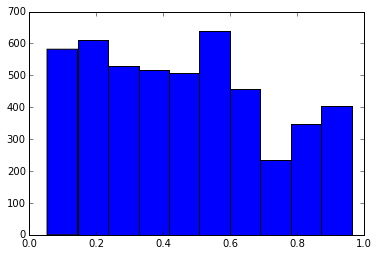

In [14]:
# In order to cut some edges, we first get an understanding of the weight distribution.
# Recall how we iterated edges before.
weights = []
for n,nbrs in legcohk.adjacency_iter():
    for nbr,eattr in nbrs.items():
        weights.append(eattr['weight'])
weights = np.array(weights)
plt.hist(weights)

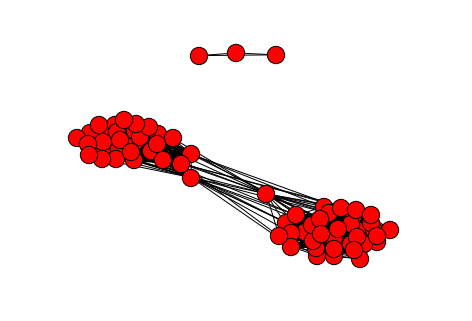

In [15]:
#%pylab
#%pylab inline
legcohk_cut = nx.Graph()
legcohk_cut.add_nodes_from(legcohk.nodes_iter())
for n,nbrs in legcohk.adjacency_iter():
    for nbr,eattr in nbrs.items():
        if eattr['weight'] > 0.5:
            legcohk_cut.add_edge(n, nbr, eattr)
nx.draw(legcohk_cut)
# You can pop out the plot and zoom in
# The following visualization is more readable now

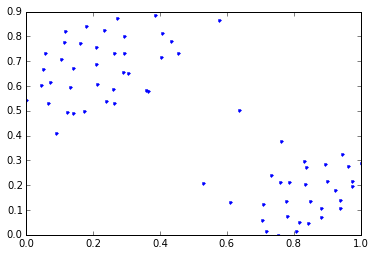

In [16]:
pos = nx.spring_layout(legcohk_cut, dim=3, iterations=500, k=1.0/4)

plt.figure()
plt.hold(True)
for (k, v) in pos.iteritems():
    plt.plot(v[0], v[1], '.b')

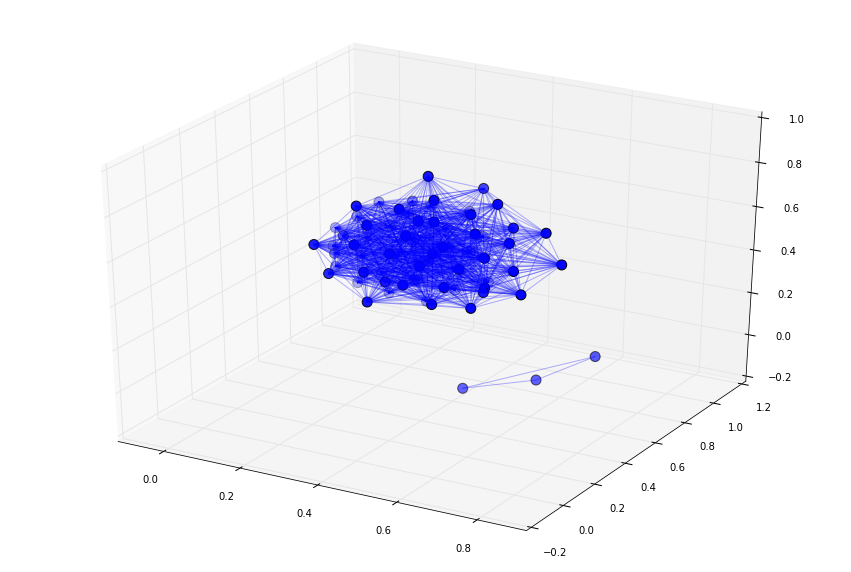

In [17]:
#%matplatlib 

pos = nx.spring_layout(legcohk_cut, dim=3, iterations=500, k=1.0/4)
m = np.matrix(pos.values()).T
x = np.array(m[0, :]).squeeze()
y = np.array(m[1, :]).squeeze()
z = np.array(m[2, :]).squeeze()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
#fig = figure()
ax = fig.add_subplot(111, projection='3d')
# Draw nodes
ax.scatter(x, y, z, s=100)
# Try to implement the picker method by referencing PCA tutorial
#ax.scatter(x, y, z, picker=True, s=100)

# Draw edges
for e in legcohk_cut.edges_iter():
    pos0 = pos[e[0]]
    pos1 = pos[e[1]]
    l = zip(pos0, pos1)
    ax.plot(l[0], l[1], l[2], color='blue', alpha=0.3)

## Adding more ingredients

Let's get the member profiles and color them by parties.

In [18]:
import requests
profile_url = 'https://raw.githubusercontent.com/kenyiu/Legco-Scraper/master/data/json/legco_members_bio_eng.json'
raw_profiles = requests.get(profile_url).json()
profiles_dict = {'name':[], 'party':[]}
for p in raw_profiles:
    if p['parties']:
        # for i in range(len(p['parties'])):
        # Only deals with the first party
        for i in range(1):
            profiles_dict['name'].append(p['name'])
            profiles_dict['party'].append(p['parties'][i])
    else:
        profiles_dict['name'].append(p['name'])
        profiles_dict['party'].append('null')
profiles = pd.DataFrame(profiles_dict)
profiles.head()

,name,party
0,Jasper TSANG Yok-sing,Democratic Alliance for the Betterment and Pro...
1,Albert HO Chun-yan,Democratic Party
2,LEE Cheuk-yan,Hong Kong Confederation of Trade Unions
3,James TO Kun-sun,Democratic Party
4,CHAN Kam-lam,Democratic Alliance for the Betterment and Pro...


In [19]:
profiles.party.unique()

array([u'Democratic Alliance for the Betterment and Progress of Hong Kong',
       u'Democratic Party', u'Hong Kong Confederation of Trade Unions',
       u'Neighbourhood and Worker\u2019s Service Centre',
       u'Business and Professionals Alliance for Hong Kong',
       u'Liberal Party',
       u"Hong Kong Association for Democracy and People's Livelihood",
       u'The Hong Kong Federation of Trade Unions', 'null',
       u'Economic Synergy', u'Civic Party', u'Civic Act-up',
       u'Functional Constituency - Industrial (Second)',
       u"Hong Kong Social Workers' General Union", u"New People's Party",
       u'April Fifth Action', u'People Power', u'Neo Democrats',
       u'New Forum', u'The Professional Commons', u'Labour Party',
       u'Functional Constituency \u2013 Commercial (Second)',
       u'The Federation of Hong Kong and Kowloon Labour Unions'], dtype=object)

In [20]:
profiles.party.describe()

count                                                    70
unique                                                   23
top       Democratic Alliance for the Betterment and Pro...
freq                                                     13
Name: party, dtype: object

In [21]:
profiles['party'].value_counts()

Democratic Alliance for the Betterment and Progress of Hong Kong    13
null                                                                 9
Democratic Party                                                     6
Business and Professionals Alliance for Hong Kong                    6
Civic Party                                                          6
The Hong Kong Federation of Trade Unions                             6
Liberal Party                                                        5
People Power                                                         2
New People's Party                                                   2
The Professional Commons                                             2
New Forum                                                            1
April Fifth Action                                                   1
Civic Act-up                                                         1
Hong Kong Confederation of Trade Unions                              1
Functi

In [22]:
color_code = {
    'Democratic Alliance for the Betterment and Progress of Hong Kong': 'red',
    'Democratic Party': 'yellow',
    'Business and Professionals Alliance for Hong Kong': 'green',
    'Civic Party': 'purple',
}

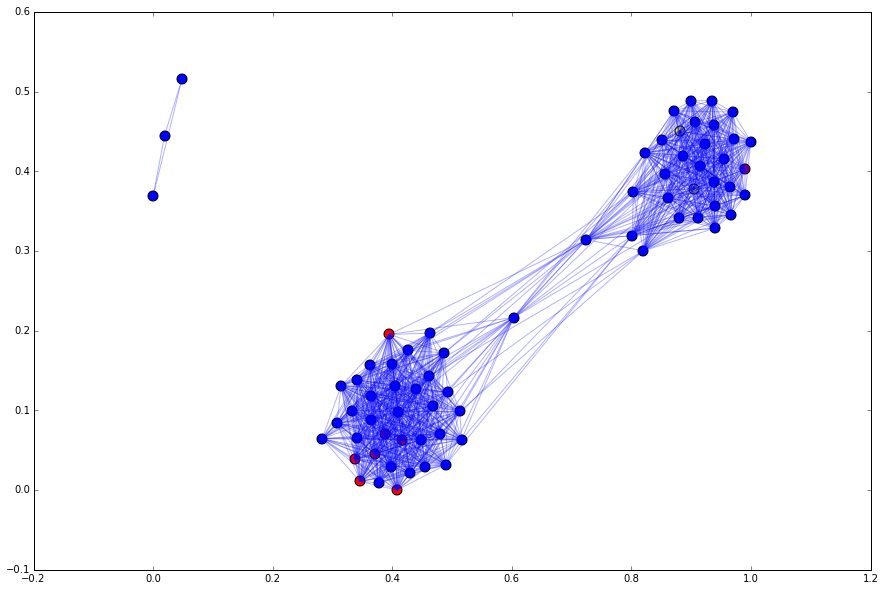

In [23]:
#%matplatlib 

pos = nx.spring_layout(legcohk_cut, dim=2, iterations=100, k=1.0/10)

profiles_map = dict(zip(profiles_dict['name'], profiles_dict['party']))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
#fig = figure()
ax = fig.add_subplot(111)#, projection='3d')
# Draw nodes
for (k, v) in pos.items():
    x = v[0]
    y = v[1]
    #z = v[2]
    ax.scatter(x, y, s=100, c=color_code.get(profiles_map.get(k, None), 'blue'))

# Draw edges
for e in legcohk_cut.edges_iter():
    pos0 = pos[e[0]]
    pos1 = pos[e[1]]
    l = zip(pos0, pos1)
    ax.plot(l[0], l[1], color='blue', alpha=0.3)

## Community Detection

Download the package from here: http://perso.crans.org/aynaud/communities/

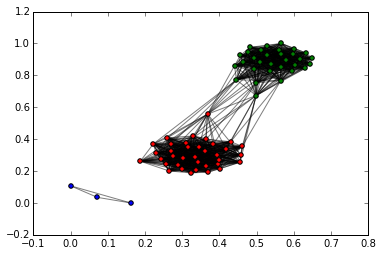

In [24]:
import community

# number of communities
K = 3
community_colors = ['red', 'green', 'blue']

#partition = community.best_partition(legcohk_cut)
dendo = community.generate_dendogram(legcohk_cut)
partition = community.partition_at_level(dendo, len(dendo)-K)

size = float(len(set(partition.values())))
pos = nx.spring_layout(legcohk_cut)
count = 0.

for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(legcohk_cut, pos, list_nodes, node_size = 20,
                                node_color = community_colors[com])
nx.draw_networkx_edges(legcohk_cut, pos, alpha=0.5)
plt.show()